In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats;
import seaborn as sns;
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.stats import zscore
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from sklearn.svm import SVC

# 1.Data Understanding and Preparation

1.A Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate variables.

In [2]:
df_1=pd.read_csv("Data1.csv")
df_2=pd.read_csv("Data2.csv")

1.B Print shape and Column Names and DataTypes of both the Dataframes

In [4]:
print("First Data frame Shape",df_1.shape)
print("First Data frame Columns",df_1.columns)
print("Second Data frame Shape",df_2.shape)
print("Second Data frame Columns",df_2.columns)

First Data frame Shape (5000, 8)
First Data frame Columns Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level'],
      dtype='object')
Second Data frame Shape (5000, 7)
Second Data frame Columns Index(['ID', 'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking',
       'CreditCard', 'LoanOnCard'],
      dtype='object')


1.C Merge both the Dataframes on ‘ID’ feature to form a single DataFrame

In [5]:
df=df_1.merge(df_2,left_on='ID',right_on='ID') 

In [9]:
df.shape

(5000, 14)

1.D Change Datatype of below features to ‘Object’ 
‘CreditCard’, ‘InternetBanking’, ‘FixedDepositAccount’, ‘Security’, ‘Level’, ‘HiddenScore’.

In [10]:
col=['HiddenScore','Level','Security','FixedDepositAccount', 'InternetBanking', 'CreditCard']
for i in col:
    df[i]=df[i].astype('category')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   5000 non-null   int64   
 1   Age                  5000 non-null   int64   
 2   CustomerSince        5000 non-null   int64   
 3   HighestSpend         5000 non-null   int64   
 4   ZipCode              5000 non-null   int64   
 5   HiddenScore          5000 non-null   category
 6   MonthlyAverageSpend  5000 non-null   float64 
 7   Level                5000 non-null   category
 8   Mortgage             5000 non-null   int64   
 9   Security             5000 non-null   category
 10  FixedDepositAccount  5000 non-null   category
 11  InternetBanking      5000 non-null   category
 12  CreditCard           5000 non-null   category
 13  LoanOnCard           4980 non-null   float64 
dtypes: category(6), float64(2), int64(6)
memory usage: 381.7 KB


# 2.Data Exploration and Analysis:

2.A Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights. 

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


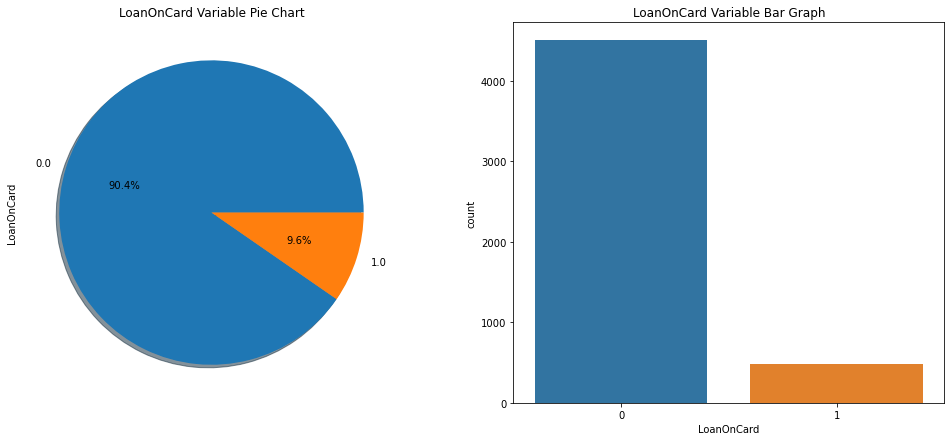

In [79]:
f,axes=plt.subplots(1,2,figsize=(17,7))
df['LoanOnCard'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('LoanOnCard',data=df,ax=axes[1],order=[0,1])
axes[0].set_title('LoanOnCard Variable Pie Chart')
axes[1].set_title('LoanOnCard Variable Bar Graph')
plt.show()

Observation : 

There is huge imbalance in target variable.

If the imbalanced data is not treated beforehand, then this will degrade the performance of the classifier model. Most of the predictions will correspond to the majority class and treat the minority class features as noise in the data and ignore them. This will result in a high bias in the model.

2.B Check the percentage of missing values and impute if required

In [12]:
df.isnull().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

Observation :
    We have very less missing value so we will drop the missing records.

In [13]:
df.dropna(axis=0,inplace=True)

In [14]:
df.isnull().sum()

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4980 entries, 9 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   4980 non-null   int64   
 1   Age                  4980 non-null   int64   
 2   CustomerSince        4980 non-null   int64   
 3   HighestSpend         4980 non-null   int64   
 4   ZipCode              4980 non-null   int64   
 5   HiddenScore          4980 non-null   category
 6   MonthlyAverageSpend  4980 non-null   float64 
 7   Level                4980 non-null   category
 8   Mortgage             4980 non-null   int64   
 9   Security             4980 non-null   category
 10  FixedDepositAccount  4980 non-null   category
 11  InternetBanking      4980 non-null   category
 12  CreditCard           4980 non-null   category
 13  LoanOnCard           4980 non-null   float64 
dtypes: category(6), float64(2), int64(6)
memory usage: 380.1 KB


In [15]:
df['LoanOnCard']=df['LoanOnCard'].astype('int64')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4980 entries, 9 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   4980 non-null   int64   
 1   Age                  4980 non-null   int64   
 2   CustomerSince        4980 non-null   int64   
 3   HighestSpend         4980 non-null   int64   
 4   ZipCode              4980 non-null   int64   
 5   HiddenScore          4980 non-null   category
 6   MonthlyAverageSpend  4980 non-null   float64 
 7   Level                4980 non-null   category
 8   Mortgage             4980 non-null   int64   
 9   Security             4980 non-null   category
 10  FixedDepositAccount  4980 non-null   category
 11  InternetBanking      4980 non-null   category
 12  CreditCard           4980 non-null   category
 13  LoanOnCard           4980 non-null   int64   
dtypes: category(6), float64(1), int64(7)
memory usage: 380.1 KB


In [17]:
df.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
9,10,34,9,180,93023,1,8.9,3,0,0,0,0,0,1
10,11,65,39,105,94710,4,2.4,3,0,0,0,0,0,0
11,12,29,5,45,90277,3,0.1,2,0,0,0,1,0,0
12,13,48,23,114,93106,2,3.8,3,0,1,0,0,0,0
13,14,59,32,40,94920,4,2.5,2,0,0,0,1,0,0


In [18]:
df['LoanOnCard'] =df['LoanOnCard'].astype('category')

C. Check for unexpected values in each categorical variable and impute with best suitable value. [2 Marks]

In [20]:
df['HiddenScore'].value_counts()

1    1466
2    1293
4    1215
3    1006
Name: HiddenScore, dtype: int64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HiddenScore', ylabel='count'>

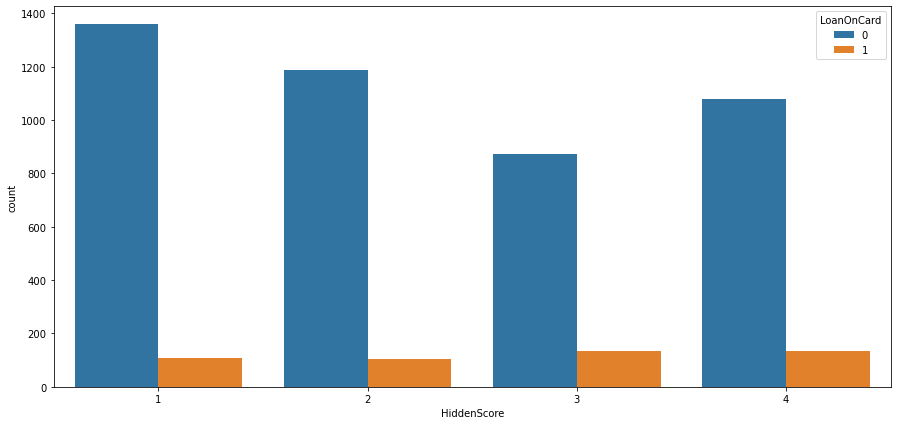

In [21]:
plt.figure(figsize=(15,7))
sns.countplot(df['HiddenScore'],hue=df['LoanOnCard'])

Hidden score is more for non-loan holders

In [27]:
df_cleanse['Level'].value_counts()

1    2089
3    1496
2    1395
Name: Level, dtype: int64

<AxesSubplot:xlabel='Level', ylabel='count'>

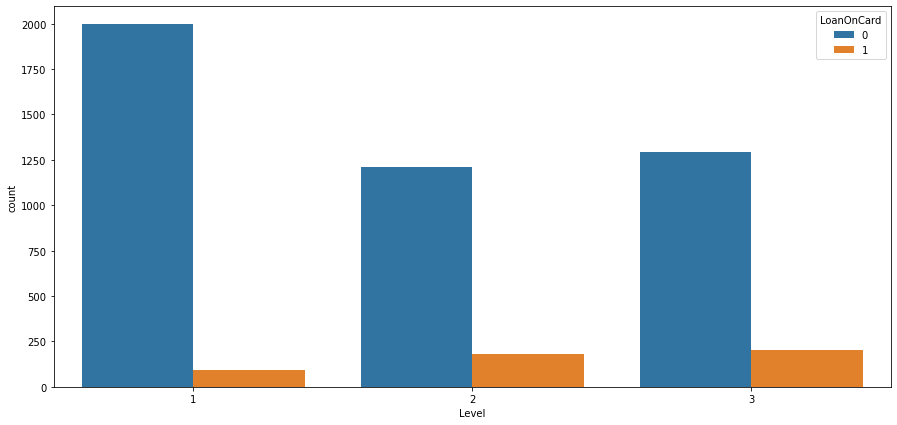

In [22]:
plt.figure(figsize=(15,7))
sns.countplot(df['Level'],hue=df['LoanOnCard'])

Level 1 has minimum number of loan holders

Loan holders in Level 2 and 3 are nearly equal

In [28]:
df_cleanse['Security'].value_counts()

0    4460
1     520
Name: Security, dtype: int64

<AxesSubplot:xlabel='Security', ylabel='count'>

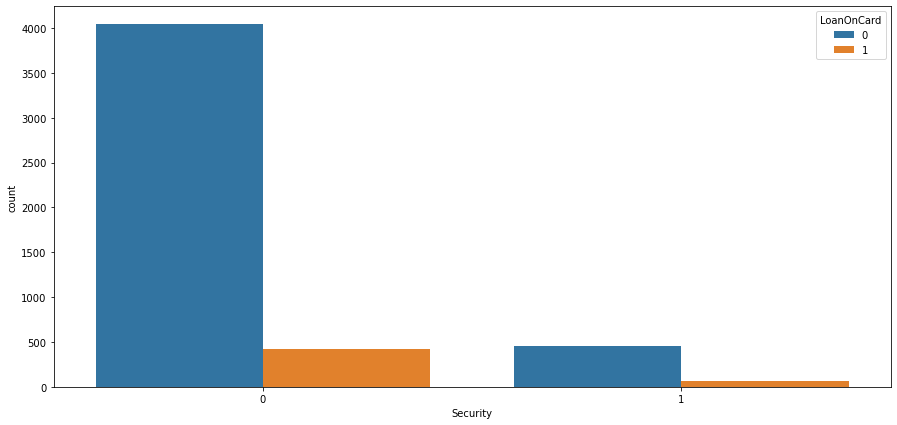

In [23]:
plt.figure(figsize=(15,7))
sns.countplot(df['Security'],hue=df['LoanOnCard'])

It is surprisingly to see more customers those who have loan does not have any security

Security of loan holders are very less

In [29]:
df_cleanse['FixedDepositAccount'].value_counts()

0    4678
1     302
Name: FixedDepositAccount, dtype: int64

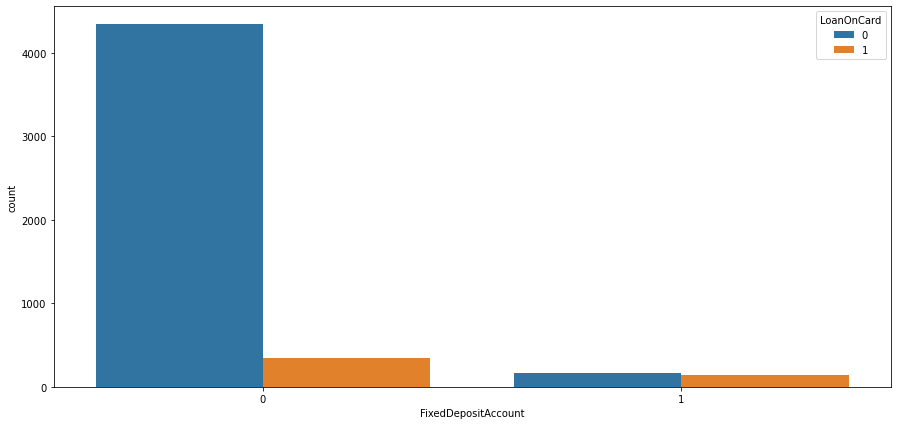

In [24]:
plt.figure(figsize=(15,7))
sns.countplot(df['FixedDepositAccount'],hue=df['LoanOnCard'])
plt.show()

Count of non loan holders are more


In [30]:
df_cleanse['InternetBanking'].value_counts()

1    2974
0    2006
Name: InternetBanking, dtype: int64

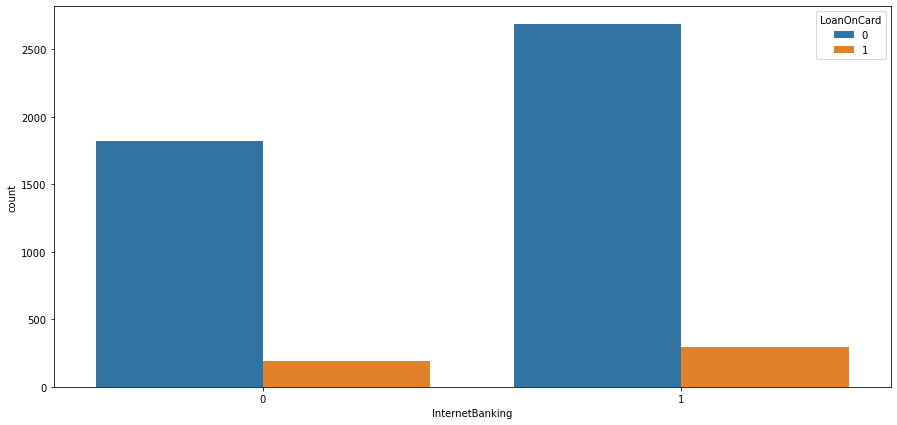

In [25]:
plt.figure(figsize=(15,7))
sns.countplot(df['InternetBanking'],hue=df['LoanOnCard'])
plt.show()

In [31]:
df_cleanse['CreditCard'].value_counts()

0    3514
1    1466
Name: CreditCard, dtype: int64

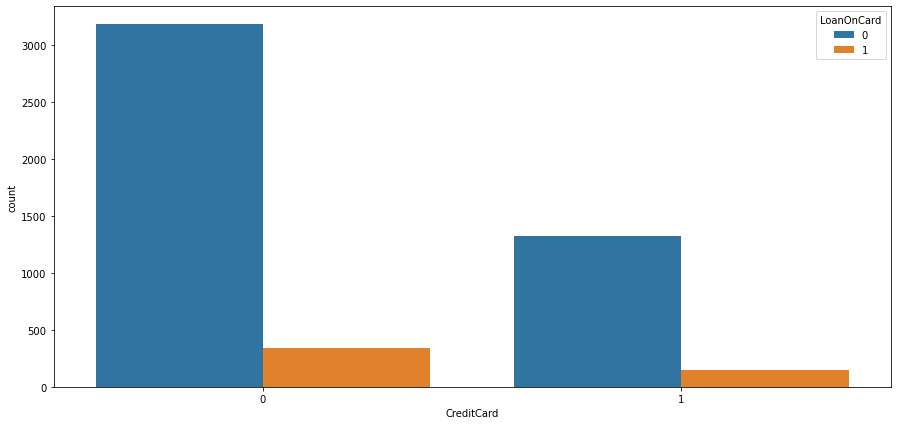

In [26]:
plt.figure(figsize=(15,7))
sns.countplot(df['CreditCard'],hue=df['LoanOnCard'])
plt.show()

# 3. Data Preparation and model building

3.A. Split data into X and Y
drop ID & ZipCode. LoanOnCard is target Variable

In [27]:
# Arrange data into independent variables and dependent variables
X=df.drop(columns=['LoanOnCard','ID','ZipCode'])
y=df['LoanOnCard'] #target

Checking on Target Imbalance

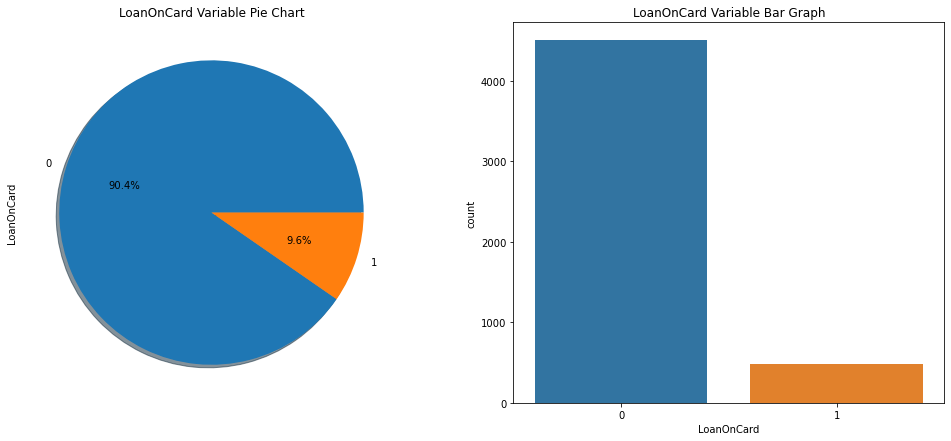

In [28]:
f,axes=plt.subplots(1,2,figsize=(17,7))
df['LoanOnCard'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('LoanOnCard',data=df,ax=axes[1],order=[0,1])
axes[0].set_title('LoanOnCard Variable Pie Chart')
axes[1].set_title('LoanOnCard Variable Bar Graph')
plt.show()

There is huge imbalance in target variable.

If the imbalanced data is not treated beforehand, then this will degrade the performance of the classifier model. Most of the predictions will correspond to the majority class and treat the minority class features as noise in the data and ignore them. This will result in a high bias in the model.

A widely adopted technique for dealing with highly unbalanced datasets is called resampling

3.B. Split data into train and test. Keep 25% data reserved for testing. 

In [29]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

3.C Train a Supervised Learning Classification base model - Logistic Regression

In [30]:
logit = LogisticRegression()
logit.fit(X_train, y_train)
logit_pred = logit.predict(X_test)

print('Accuracy on Training data:',logit.score(X_train, y_train) )
print('Accuracy on Test data:',logit.score(X_test, y_test) )

Accuracy on Training data: 0.9461847389558233
Accuracy on Test data: 0.9590361445783132


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Observation : 
94% accuracy on training set and 95% accuracy on test set.

Here training set accuracy and testing accuracy are balanced when model is built without sampling also accuracy is good

4.D. Print evaluation metrics for the model and clearly share insights. 

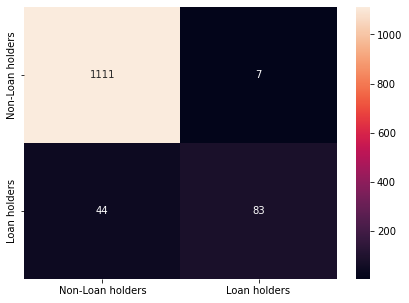

In [31]:
cm = confusion_matrix(y_test, logit_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In the above figure 44 and 7 are the errors in the model.

In [32]:
print("classification  Matrix:\n",classification_report(y_test,logit_pred))

classification  Matrix:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      1118
           1       0.92      0.65      0.76       127

    accuracy                           0.96      1245
   macro avg       0.94      0.82      0.87      1245
weighted avg       0.96      0.96      0.96      1245



Here you can see model is poor in predicting class 1 compared to class 0

Accuracy is good but in this case we need to look on recall value

Here Recall tells that only 65% class 1 is predicted correctly from actual values

We dont have enough sample of class 1 to train the model.

We will do the sampling and check how recall values improves in this case.

3.E Balance the data using the right balancing technique

3.E i. Check distribution of the target variable

In [96]:
print(y.value_counts())

Before sampling:
0    4500
1     480
Name: LoanOnCard, dtype: int64


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


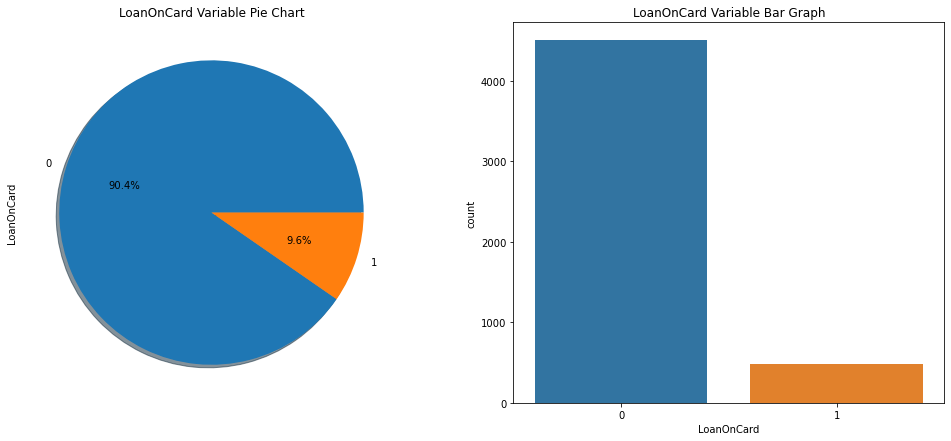

In [33]:
f,axes=plt.subplots(1,2,figsize=(17,7))
df['LoanOnCard'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('LoanOnCard',data=df,ax=axes[1],order=[0,1])
axes[0].set_title('LoanOnCard Variable Pie Chart')
axes[1].set_title('LoanOnCard Variable Bar Graph')
plt.show()

Here you need to balance the target variable as 50:50.

In [34]:
smote_nc=SMOTENC(categorical_features=[3,5,7,8,9,10],random_state=10) #specifying categorical column numbers
X_s,y_s=smote_nc.fit_resample(X,y)

In [35]:
print('After sampling:')
print(y_s.value_counts())

After sampling:
0    4500
1    4500
Name: LoanOnCard, dtype: int64


In [ ]:
3.F Again train the same previous model on balanced data.

In [36]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.30, random_state=1)

In [37]:
logit = LogisticRegression()
logit.fit(X_train, y_train)
logit_pred = logit.predict(X_test)

#print('Accuracy on Training data:',logit.score(X_train, y_train) )
#print('Accuracy on Test data:',logit.score(X_test, y_test) )

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
print('Accuracy on Training data:',logit.score(X_train, y_train) )
print('Accuracy on Test data:',logit.score(X_test, y_test) )

Accuracy on Training data: 0.9063492063492063
Accuracy on Test data: 0.9114814814814814


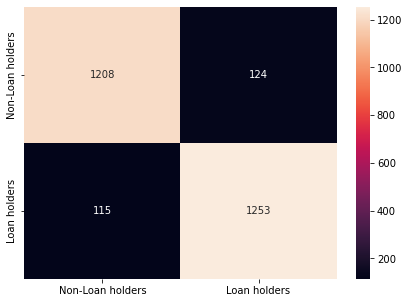

In [39]:
cm = confusion_matrix(y_test, logit_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [40]:
print("classification  Matrix:\n",classification_report(y_test,logit_pred))


classification  Matrix:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91      1332
           1       0.91      0.92      0.91      1368

    accuracy                           0.91      2700
   macro avg       0.91      0.91      0.91      2700
weighted avg       0.91      0.91      0.91      2700



Observation : 
Now we can see recall value is improved after sampling.

So whenever we have imbalance target we will use sampling method to balance the data.

# 4. Performance Improvement

4.A. Train a base model each for SVM, KNN

KNN

In [41]:
KNN = KNeighborsClassifier(n_neighbors= 5 , metric = 'euclidean' ) #Building knn with 5 neighbors

In [42]:
KNN.fit(X_train, y_train)
predicted_labels = KNN.predict(X_test)

In [43]:
print('Accuracy on Training data:',KNN.score(X_train, y_train) )
print('Accuracy on Test data:',KNN.score(X_test, y_test) )

Accuracy on Training data: 0.9404761904761905
Accuracy on Test data: 0.9207407407407407


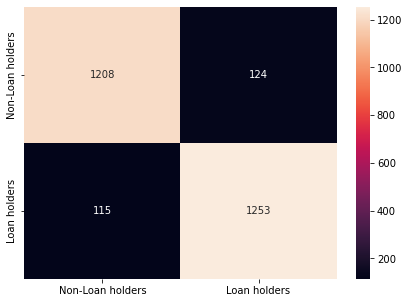

In [44]:
cm = confusion_matrix(y_test, logit_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [45]:
print("classification  Matrix:\n",classification_report(y_test,predicted_labels))

classification  Matrix:
               precision    recall  f1-score   support

           0       0.97      0.87      0.92      1332
           1       0.88      0.97      0.93      1368

    accuracy                           0.92      2700
   macro avg       0.93      0.92      0.92      2700
weighted avg       0.93      0.92      0.92      2700



F1 Score is increaed .2 to  0.93 

SVM

In [61]:
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, y_train)

SVC()

In [62]:

print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.8784126984126984
0.8866666666666667


In [63]:
svc_model  = SVC(kernel='poly')
svc_model.fit(X_train, y_train)
  
prediction = svc_model.predict(X_test)
  
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.8655555555555555
0.8781481481481481


In [64]:
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))

Confusion Matrix:
 [[1160  157]
 [ 172 1211]]


Observation & Improvement 

Sampling improved to predict minority classes as well

Suggesting to collect data equally for both the classes.

Few customers does't have credit card but those customer having loan on card. This data error can be avoided